In [1]:
!pip install fredapi


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing the necessary modules to perform exploratory data analysis and visualize results

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500


from fredapi import Fred
fred_key = '41025c4035a46a9fa96e34da3ee63bf4'

# 1. To use the FRED api, I need to create Fred Object to search and access data

In [3]:
fred = Fred(api_key = fred_key)

# 2. Search for Economic Data

In [4]:
fred.search('S&P', order_by = 'popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-11-10,2022-11-10,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-11-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-10 09:00:04-06:00,96,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-11-10,2022-11-10,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-11-10,2022-11-10,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-11-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-10 09:00:04-06:00,86,This data represents the effective yield of th...
SP500,SP500,2022-11-10,2022-11-10,S&P 500,2012-11-12,2022-11-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-10 19:10:49-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2022-11-10,2022-11-10,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-10-25 08:02:03-05:00,82,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCT1502OR,GCT1502OR,2022-11-10,2022-11-10,Bachelor's Degree or Higher for Oregon,2006-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-09-15 11:00:23-05:00,3,Estimate of educational attainment for populat...
CRDQGRAPABIS,CRDQGRAPABIS,2022-11-10,2022-11-10,"Total Credit to Private Non-Financial Sector, ...",1960-01-01,2022-01-01,"Quarterly, End of Quarter",Q,Billions of Euros,Bil. of Euros,Not Seasonally Adjusted,NSA,2022-09-19 13:03:56-05:00,3,"Credit is provided by domestic banks, all othe..."
DDDI06LKA156NWDB,DDDI06LKA156NWDB,2022-11-10,2022-11-10,Central Bank Assets to GDP for Sri Lanka,1960-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:33:35-05:00,3,Ratio of central bank assets to GDP. Central b...


# 3. Pulling Raw Data & Plotting for S&P

In [5]:
sp500 = fred.get_series(series_id = 'SP500')

<AxesSubplot: title={'center': 'S&P 500'}>

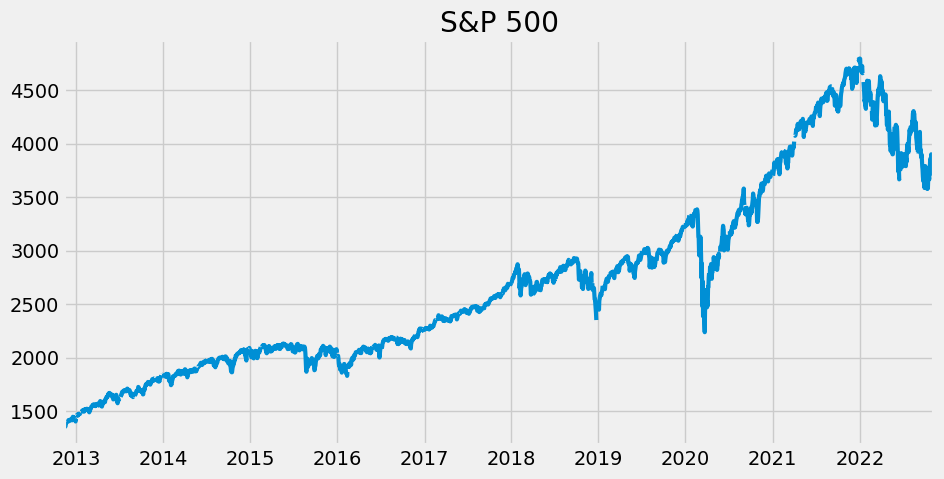

In [6]:
sp500.plot(figsize = (10, 5), title = 'S&P 500', lw = 3)

# 4. Pulling and Joining multiple data series

<AxesSubplot: >

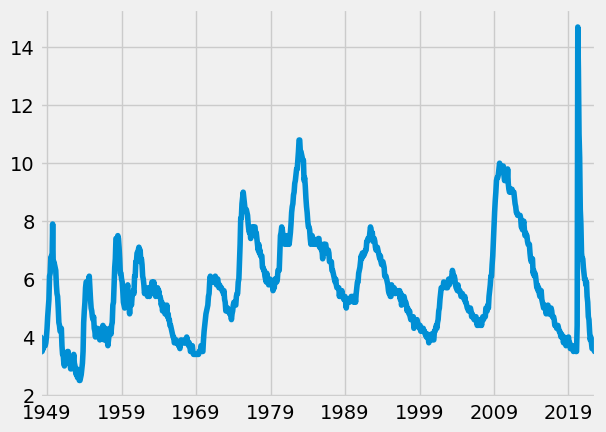

In [7]:
fred.search('unemployment')
unrate = fred.get_series(series_id = 'UNRATE')
unrate.plot()

In [8]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [12]:
total_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    total_results.append(results)
    time.sleep(0.1)
unemp_results = pd.concat(total_results, axis = 1)

In [33]:
cols_to_drop = []

for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_results = unemp_results.drop(columns = cols_to_drop, axis = 1)
unemp_states = unemp_results.dropna()

In [67]:
px.line(unemp_states)

# Pull Unemployment Rate data for each state during May 2020

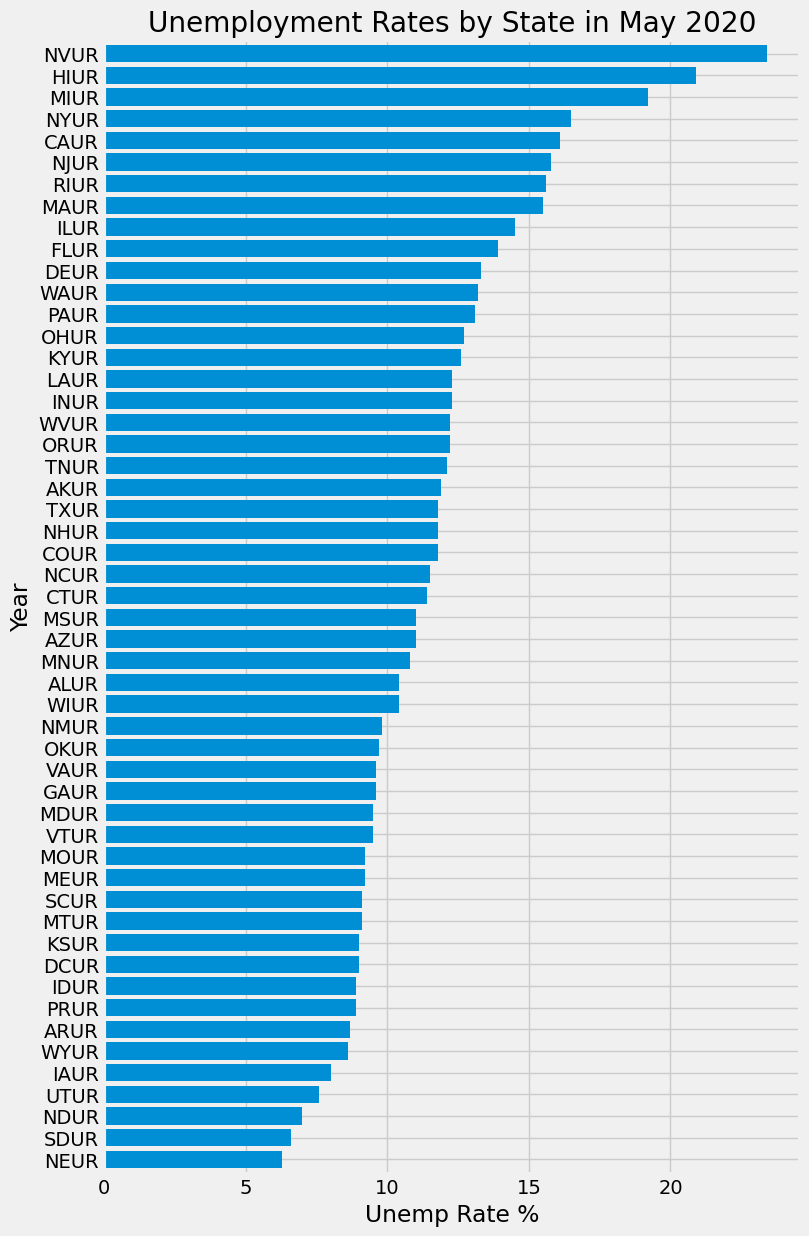

In [71]:
fig = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind = "barh", figsize = (8, 14), width = 0.8, title = "Unemployment Rates by State in May 2020", xlabel = "Unemp Rate %", ylabel = "Year")
fig.legend().remove()
plt.show()

In [92]:
part_df = fred.search("participation rate state", filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"' )
part_id_to_state = part_df['title'].str.replace("Labor Force Participation Rate for", '').to_dict()

In [93]:
total_results = []
for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    total_results.append(results)
    time.sleep(0.1)
part_state = pd.concat(total_results, axis = 1)


In [95]:
unemp_states.columns

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'MIUR', 'PAUR', 'ALUR', 'MNUR',
       'ILUR', 'KYUR', 'WIUR', 'NCUR', 'AKUR', 'MAUR', 'INUR', 'MOUR', 'COUR',
       'AZUR', 'NJUR', 'TNUR', 'VAUR', 'GAUR', 'WVUR', 'LAUR', 'OKUR', 'SCUR',
       'NMUR', 'NDUR', 'ORUR', 'UTUR', 'ARUR', 'HIUR', 'WAUR', 'NVUR', 'KSUR',
       'IAUR', 'MEUR', 'SDUR', 'CTUR', 'MDUR', 'IDUR', 'WYUR', 'MSUR', 'DCUR',
       'MTUR', 'NEUR', 'PRUR', 'NHUR', 'DEUR', 'RIUR', 'VTUR'],
      dtype='object')